<a href="https://colab.research.google.com/github/adpakw/Analytics-learn/blob/main/Risk_analytics_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Отбор на курс "Риск аналитика" от Тинькофф образования



## Задание 1



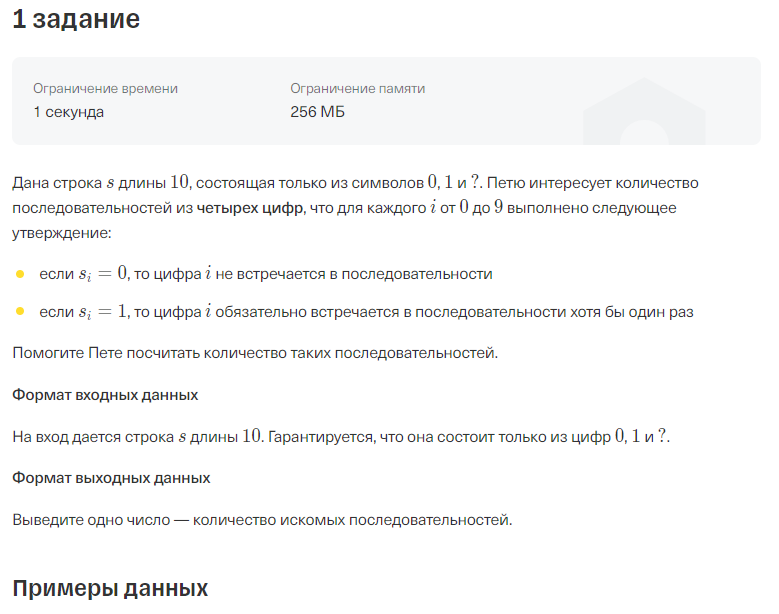

input_1 - 1?0101?0?0

output_1 - 108

input_2 - 1?1?1?01?1

output_2 - 0

input_3 - 00010?0001

output_3 - 50

In [ ]:
def generate_array_sequences():
  array = []
  for x1 in range(0,10):
    for x2 in range(0,10):
      for x3 in range(0,10):
        for x4 in range(0,10):
          array.append(str(x1) + str(x2) + str(x3) + str(x4))
  return array

# arr = generate_array_sequences()
# arr[-1000:]

In [ ]:
def filter_sequence(element, condition):
  for i, val in enumerate(condition):
    if val == '0' and str(i) in element:
      return False
    if val == '1' and str(i) not in element:
      return False
  return True

# ans = filter_sequence('1234', '?11??00000')
# ans

In [ ]:
def count_filtered_sequences(condition):
  filtered_array = [seq for seq in generate_array_sequences() if filter_sequence(seq, condition)]
  return len(filtered_array)

ans = count_filtered_sequences('00010?0001')
ans

50

In [ ]:
# Full Solution
def generate_array_sequences():
  array = []
  for x1 in range(0,10):
    for x2 in range(0,10):
      for x3 in range(0,10):
        for x4 in range(0,10):
          array.append(str(x1) + str(x2) + str(x3) + str(x4))
  return array

def filter_sequence(element, condition):
  for i, val in enumerate(condition):
    if val == '0' and str(i) in element:
      return False
    if val == '1' and str(i) not in element:
      return False
  return True

def count_filtered_sequences(condition):
  filtered_array = [seq for seq in generate_array_sequences() if filter_sequence(seq, condition)]
  return len(filtered_array)

condition = input()
print(count_filtered_sequences(condition))

1?0101?0?0
108


## Задание 2

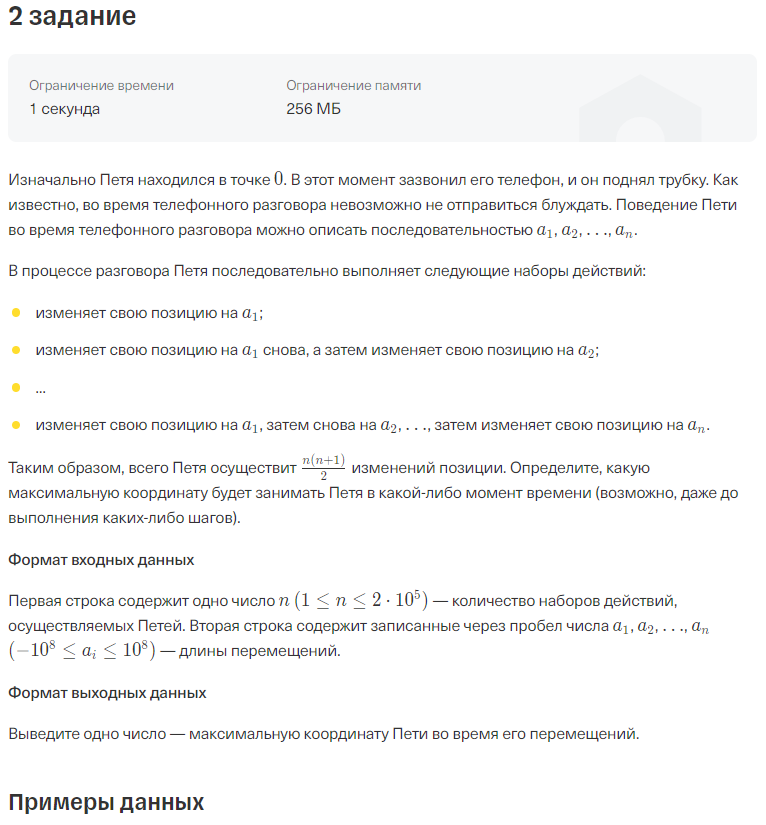

| input               | output              |
|---------------------|---------------------|
| 3                   |                     |
| 4 -2 -4             | 10                  |
| 5                   |                     |
| -3 2 4 -1 -2        | 4                   |
| 4                   |                     |
| -10 -10 -10 -10     | 0                   |


In [ ]:
# Full solution
def max_pos(n, actions):
  max_coordinate = 0
  current_coordinate = 0

  for i in range(n):
      for j in range(i+1):
          current_coordinate += actions[j]
          max_coordinate = max(max_coordinate, current_coordinate)
  return max_coordinate

n = int(input())
actions = list(map(int, input().split()))
print(max_pos(n, actions))

5
-3 2 4 -1 -2
4


## Задание 3

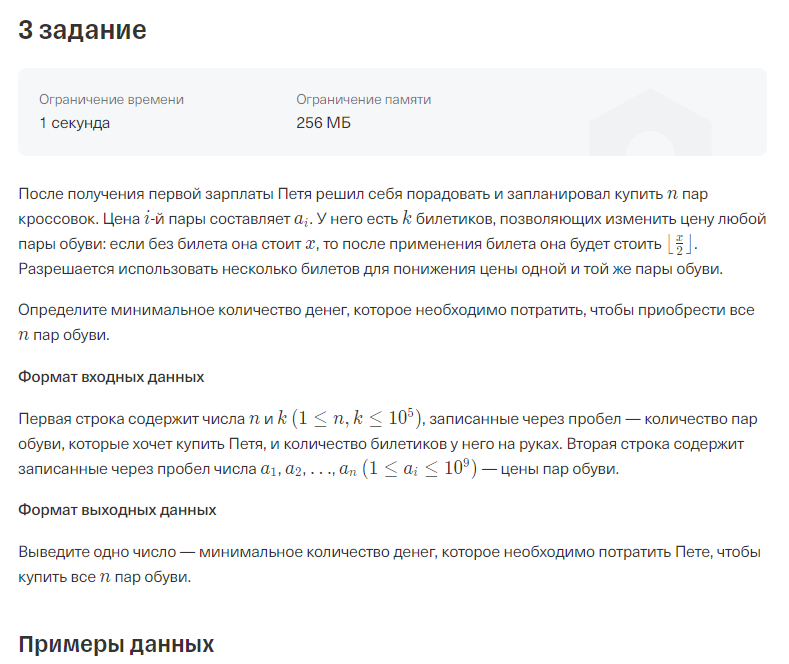

|input|output|
|----|----|
|3 3||
|2 15 10|10|
|5 5||
|9 7 5 3 1|9|
|1 10||
|100|0|
|3 0||
||

In [ ]:
# Full solution
def solution(n, k, array):
  while (k>0):
    i = array.index(max(array))
    array[i] = int(array[i] / 2)
    k-=1
  return sum(array)

n, k = map(int, input().split())
array = list(map(int, input().split()))
array = array[0:n]
print(solution(n, k, array))

3 0
5 4 6
15


## Задание 4

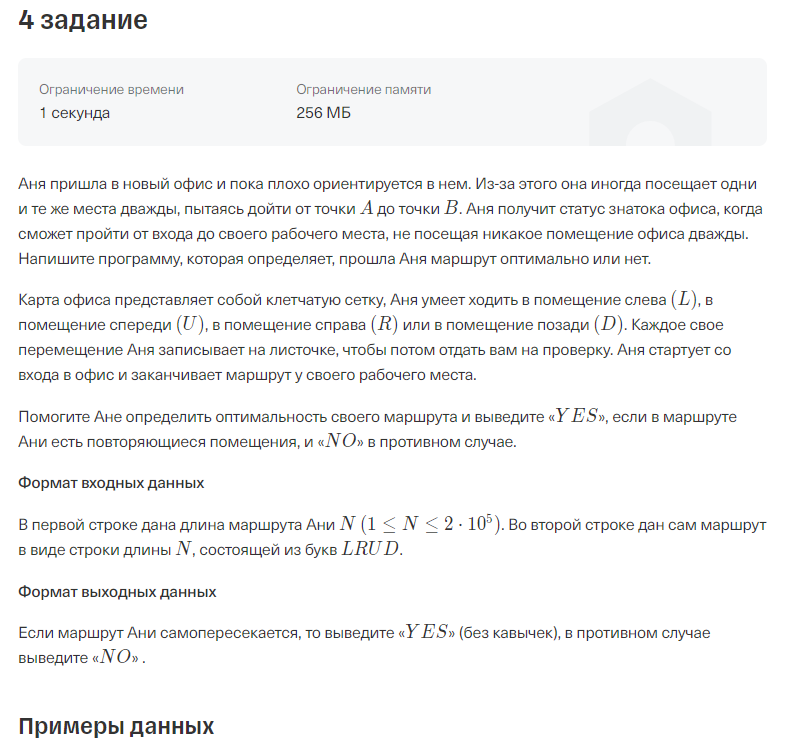

|input|output|
|----|----|
|4||
|DLUL|NO|
|7||
|DLLURDD|YES|

In [ ]:
# Full solution
def optimal_route(N, route):
    visited_positions = set()
    current_position = (0, 0)

    for move in route:
        if move == 'L':
            current_position = (current_position[0], current_position[1] - 1)
        elif move == 'R':
            current_position = (current_position[0], current_position[1] + 1)
        elif move == 'U':
            current_position = (current_position[0] - 1, current_position[1])
        elif move == 'D':
            current_position = (current_position[0] + 1, current_position[1])
        if current_position in visited_positions:
            return "YES"

        visited_positions.add(current_position)

    return "NO"

N = int(input())
route = input()

print(optimal_route(N, route))

7
DLLURDD
YES


# Тест

## Задание 1


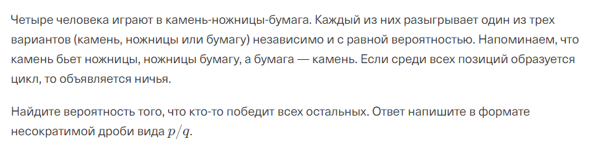

In [ ]:
'''
1, 2, 3, 4 - номера игроков
К, Н, Б - камень, ножницы, бумага

1  2  3  4
К  Н  Н  Н
Н  Б  Б  Б
Б  К  К  К

Удовлетворяющих условию выигрышу только одного 3 * 4

Кол-во всех исходов можно посчитать через формулу количества размещений с повторениями n = 3, m = 4
'''
from fractions import Fraction

wins = 3 * 4
all_options = 3**4
probability = wins / all_options

print('probability =', Fraction(wins, all_options), '=', probability)

probability = 4/27 = 0.14814814814814814


## Задание 2

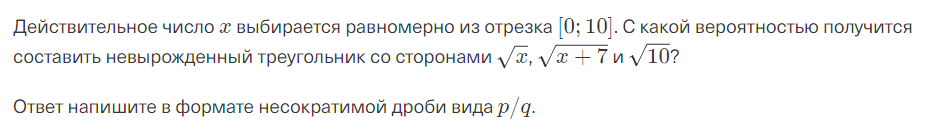

In [ ]:
from sympy import symbols, solveset, Interval, sqrt
from fractions import Fraction

x = symbols('x')

a = sqrt(x)
b = sqrt(x) + 7/sqrt(10)
c = sqrt(10)

conditions = [
    a + b > c,
    a + c > b,
    b + c > a
]

# Интервал для x
interval = Interval(0, 10)
# print(interval, type(interval))

# Найдем решение на интервале для x
solution_set = interval
for condition in conditions:
    # print(solveset(condition, x, domain=interval), type(solveset(condition, x, domain=interval)))
    solution_set = solution_set.intersect(solveset(condition, x, domain=interval))

# Вычислим вероятность
probability = solution_set.measure / interval.measure
print('probability =', Fraction(solution_set.measure, interval.measure), '=', float(probability))

probability = 391/400 = 0.9775


## Задание 3

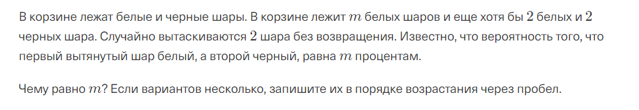

In [ ]:
from sympy import symbols, Eq, solve

m = symbols('m', integer=True, positive=True)
w = symbols('w', integer=True, positive=True)
possible_values_m = []
for black_balls in range(2,101):
  prob_equation = Eq(((w + m) / (m + w + black_balls)) * (black_balls / (m + w + black_balls - 1)), m / 100)
  for white_balls in range(2, 101):
      solutions = solve(prob_equation.subs(w, white_balls), m)
      for sol in solutions:
          if sol.is_integer and sol > 1 and sol <= 100:
              possible_values_m.append(sol)
              print(white_balls, black_balls, sol)

possible_values_m = sorted(set(possible_values_m))
possible_values_m

11 3 11
7 4 14
62 9 10
13 12 20
38 19 19
3 21 25
91 21 14
84 22 15
11 28 25
68 33 20
3 36 25
20 36 25
11 45 25
30 45 25
20 55 25
41 55 25
30 66 25
53 66 25
41 78 25
66 78 25
13 88 20
53 91 25
80 91 25
7 99 15


[10, 11, 14, 15, 19, 20, 25]

## Задание 4

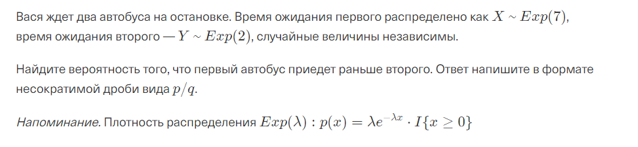

In [ ]:
from sympy import symbols, integrate, exp, oo, Rational, simplify

x, y = symbols('x y', real=True, positive=True)
lambda_x = 7
lambda_y = 2

p_x = lambda_x * exp(-lambda_x * x)
p_y = lambda_y * exp(-lambda_y * y)

joint_density = p_x * p_y

probability = integrate(joint_density, (y, x, oo), (x, 0, oo))

probability_simplified = simplify(probability)
# probability_rational = Rational(probability_simplified).limit_denominator()
probability_simplified

7/9